# Unsupervised Learning

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from scipy.stats import mode


In [38]:
# 1. Load and explore the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


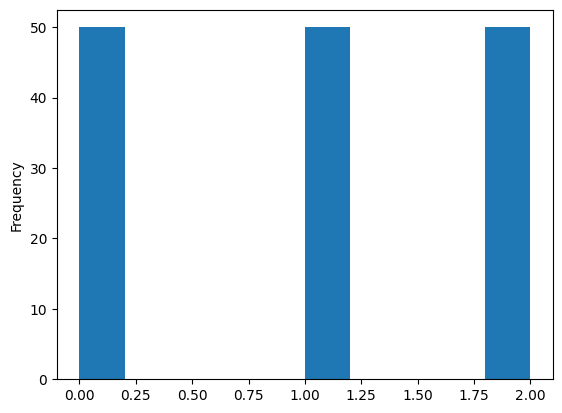

In [40]:
data.species.plot(kind='hist');

In [47]:
# 2. Data Preprocessing
features = data.drop('species', axis=1)
labels = data.species
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [50]:
features.shape, labels.shape

((150, 4), (150,))

Silhouette Score (K-Means): 0.48


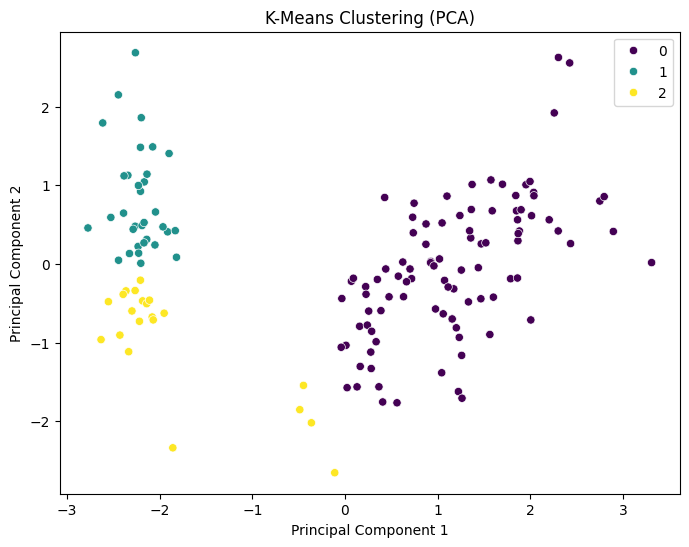

In [51]:
# 3. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
print(f"Silhouette Score (K-Means): {silhouette_score(scaled_features, kmeans_labels):.2f}")

# Visualize K-Means Clustering with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [27]:
# 4. Hierarchical Clustering
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=iris.target)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_features)
print(f"Silhouette Score (Hierarchical): {silhouette_score(scaled_features, hierarchical_labels):.2f}")

# Visualize Hierarchical Clustering with PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=hierarchical_labels, palette='coolwarm')
plt.title('Hierarchical Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

ValueError: Dimensions of Z and labels must be consistent.

<Figure size 1000x700 with 0 Axes>

In [ ]:
# 5. Conclusion
print("Both K-Means and Hierarchical Clustering effectively separate the Iris dataset into clusters.")

In [52]:
# 3. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
print(f"Silhouette Score (K-Means): {silhouette_score(scaled_features, kmeans_labels):.2f}")

Silhouette Score (K-Means): 0.48


In [55]:
kmeans_labels

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [57]:
np.array(labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
# Map K-Means labels to true labels for accuracy
kmeans_accuracy = accuracy_score(data['species'], kmeans_labels)
print(f"Accuracy (K-Means): {kmeans_accuracy:.2f}")

Accuracy (K-Means): 0.00


In [ ]:
# Visualize K-Means Clustering with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 4. Hierarchical Clustering
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=iris.target)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_features)
print(f"Silhouette Score (Hierarchical): {silhouette_score(scaled_features, hierarchical_labels):.2f}")

# Map Hierarchical labels to true labels for accuracy
hierarchical_mapped_labels = np.zeros_like(hierarchical_labels)
for i in range(3):
    mask = (hierarchical_labels == i)
    hierarchical_mapped_labels[mask] = mode(data['species'][mask])[0]
hierarchical_accuracy = accuracy_score(data['species'], hierarchical_mapped_labels)
print(f"Accuracy (Hierarchical): {hierarchical_accuracy:.2f}")

# Visualize Hierarchical Clustering with PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=hierarchical_labels, palette='coolwarm')
plt.title('Hierarchical Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 5. Conclusion
print("Both K-Means and Hierarchical Clustering effectively separate the Iris dataset into clusters.")
print("Silhouette Score evaluates how well each point fits in its cluster, while Accuracy compares clustering results to actual species labels.")